Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares europeos.
Este conjunto de datos presenta transacciones ocurridas en dos días, donde se registraron 492 fraudes de un total de 284.807 transacciones. El conjunto de datos presenta un alto desequilibrio: la clase positiva (fraudes) representa el 0,172 % del total de transacciones.

Contiene únicamente variables de entrada numéricas resultantes de una transformación PCA. Lamentablemente, debido a cuestiones de confidencialidad, no podemos proporcionar las características originales ni más información sobre los datos. Las características V1, V2, … V28 son los componentes principales obtenidos con PCA; las únicas características que no se han transformado con PCA son «Tiempo» e «Importe». La característica «Tiempo» contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. La característica «Importe» es el importe de la transacción; esta característica puede utilizarse para el aprendizaje sensible a los costes según el ejemplo. La característica «Clase» es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Dada la tasa de desequilibrio de clases, recomendamos medir la precisión mediante el área bajo la curva de precisión-recuperación (AUPRC). La precisión de la matriz de confusión no es significativa para la clasificación desequilibrada.

El conjunto de datos se recopiló y analizó durante una colaboración de investigación entre Worldline y el Grupo de Aprendizaje Automático ( http://mlg.ulb.ac.be ) de la ULB (Universidad Libre de Bruselas) sobre minería de big data y detección de fraude.
Para más información sobre proyectos actuales y anteriores sobre temas relacionados, visite http://mlg.ulb.ac.be/BruFence y http://mlg.ulb.ac.be/ARTML .

## Objetivo:
Predecir el fraude con tarjetas de crédito en los datos transaccionales. 

    Se Utilizara TensorFlow para construir el modelo predictivo
    t-SNE para la vizualizacion de datos de el conjunto de datos en dos dimensiones.
    
Para esto primero haremos una exploración de los datos, despues una construcción de la red neuronal y por ultimo la visualización de los datos con t-SNE.

In [1]:
#importar librerias
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [23]:
df = pd.read_csv("C:/Users/Jesus Eduardo/Documents/Bank marketing/Marketing bancario/creditcard.csv")

In [24]:
#Echamos un promer vistazo a los datos 
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [25]:
print("El conjunto de datos de marketing bancario consta de {rows} filas.".format(rows = len(df)))

El conjunto de datos de marketing bancario consta de 284807 filas.


In [26]:
#y el valor de datos faltantes sera:
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

Como podemos ver es un dataset sin valores faltantes 


In [27]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Fraude: 492
Normal: 284315


<Axes: title={'center': 'Fraude y normal'}, xlabel='Class'>

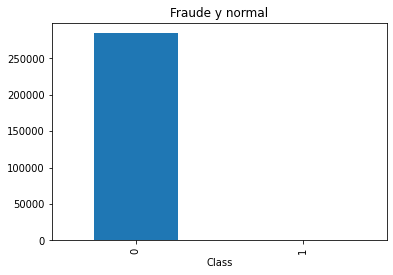

In [28]:
number_of_fraud = len(df[df.Class == 1])
number_of_normal= len(df[df.Class == 0])

print ("Fraude:", number_of_fraud)
print ("Normal:",number_of_normal)

value_counts = df['Class'].value_counts()
value_counts.plot.bar(title = 'Fraude y normal')

Fraude es una minima parte de los clientes

Veamos cómo se compara el tiempo entre transacciones fraudulentas y normales.

In [29]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


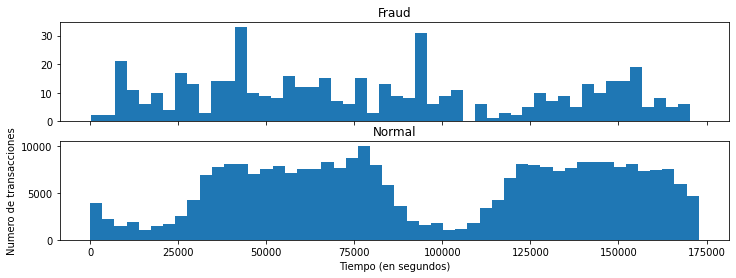

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Tiempo (en segundos)')
plt.ylabel('Numero de transacciones')
plt.show()

La función "Tiempo" es bastante similar en ambos tipos de transacciones. Se podría argumentar que las transacciones fraudulentas se distribuyen de forma más uniforme, mientras que las transacciones normales tienen una distribución cíclica. Esto nos ayudara a facilitar la detección de una transacción fraudulenta en horas de baja demanda.

importe de la transacción entre fraude y normal client

In [31]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


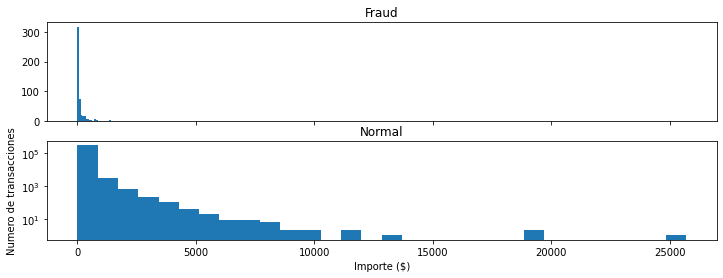

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Importe ($)')
plt.ylabel('Numero de transacciones')
plt.yscale('log')
plt.show()

In [33]:
df['Monto_máximo_de_fraude'] = 1
df.loc[df.Amount <= 2125.87, 'Monto_máximo_de_fraude'] = 0

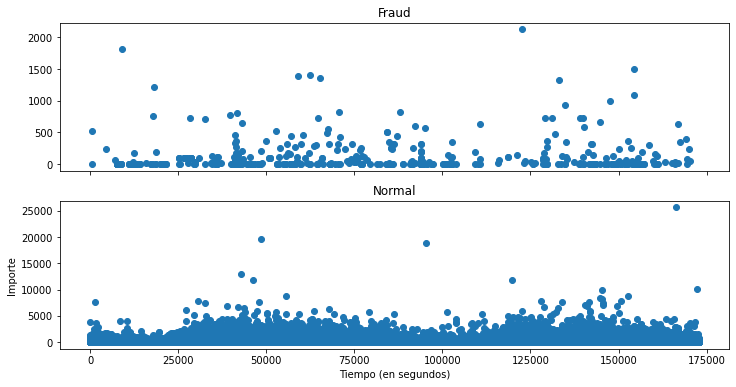

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Tiempo (en segundos)')
plt.ylabel('Importe')
plt.show()

No se puede sacar nada de esto 

Entonces prosigamos con el analisis

In [35]:
#Seleccionamos solo las columnas que contienen las caracteristicas v1, v1,...,v28
v_features = df.iloc[:,1:29].columns

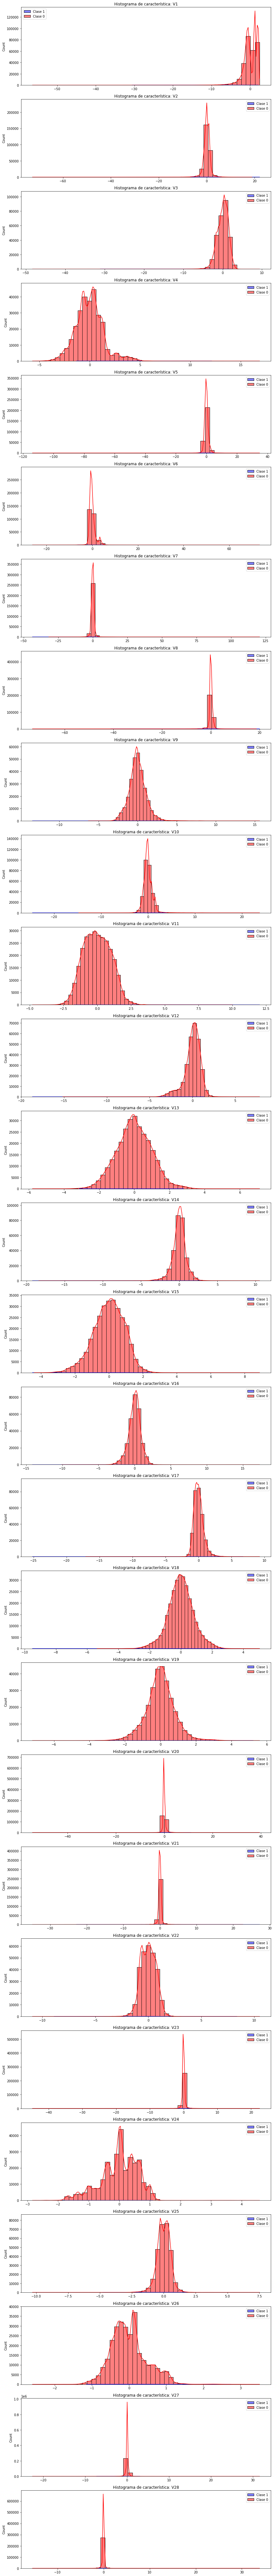

In [18]:
plt.figure(figsize=(12, 28 * 4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    # Reemplaza sns.distplot con sns.histplot
    sns.histplot(df[cn][df.Class == 1], bins=50, kde=True, ax=ax, color='blue', label='Clase 1')
    sns.histplot(df[cn][df.Class == 0], bins=50, kde=True, ax=ax, color='red', label='Clase 0')
    ax.set_xlabel('')
    ax.set_title('Histograma de característica: ' + str(cn))
    ax.legend() # Agrega una leyenda para distinguir las clases
plt.tight_layout() # Ajusta automáticamente los subplots para que no se superpongan
plt.show()

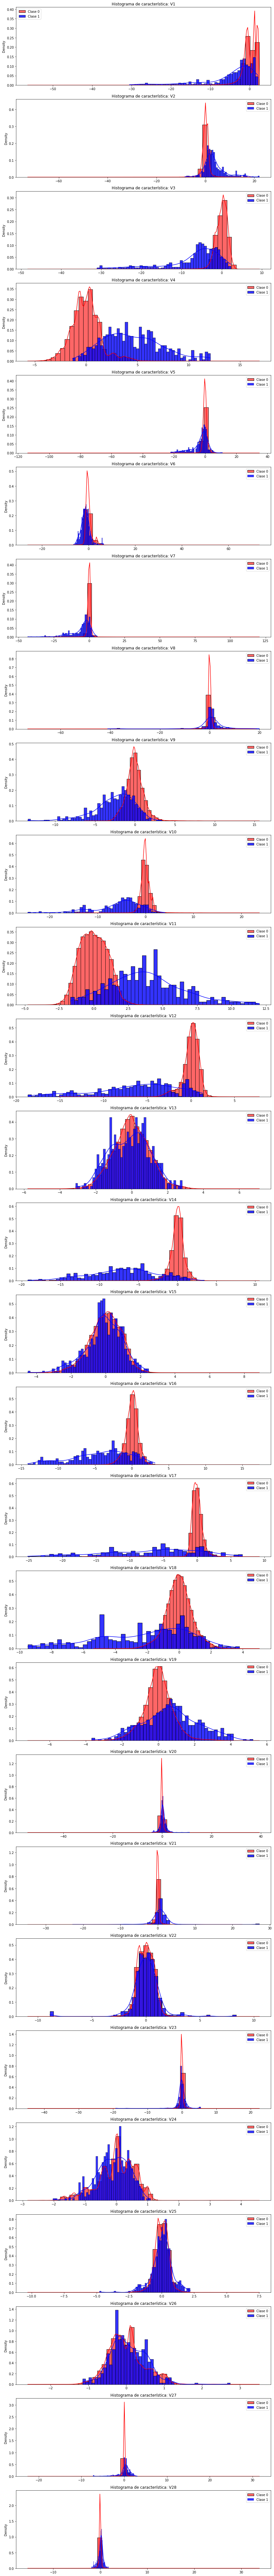

In [36]:
plt.figure(figsize=(12, len(v_features) * 4)) # Ajusta la altura de la figura dinámicamente
gs = gridspec.GridSpec(len(v_features), 1) # Ajusta el número de filas dinámicamente

for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])

    # Histograma para la Clase 0
    sns.histplot(
        df[cn][df.Class == 0],
        bins=50,
        kde=True,
        ax=ax,
        color='red',       # Color para la Clase 0
        label='Clase 0',
        alpha=0.6,         # Hace el histograma semi-transparente
        stat='density'     # Normaliza para comparar formas, no conteos
    )

    # Histograma para la Clase 1
    sns.histplot(
        df[cn][df.Class == 1],
        bins=50,
        kde=True,
        ax=ax,
        color='blue',      # Color para la Clase 1 (más visible)
        label='Clase 1',
        alpha=0.8,         # Un poco menos transparente para que resalte
        stat='density'     # Normaliza también para la Clase 1
    )

    ax.set_xlabel('')
    ax.set_title(f'Histograma de característica: {cn}') # Uso de f-string para un título más limpio
    ax.legend() # Muestra la leyenda para distinguir las clases

plt.tight_layout() # Ajusta automáticamente los subplots para que no se superpongan
plt.show()

Podemos ver que nuestros datos estan desequilibrados, por lo que haremos algo al rescpeto, pero primero vamos a escalar los datos.

## standardscaler

In [37]:
X=df.drop(columns=["Class"])
y=df["Class"]

In [39]:
from sklearn import preprocessing

In [41]:
names=X.columns
scaled_df = preprocessing.scale(X)
scaled_df = pd.DataFrame(scaled_df,columns=names)
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Monto_máximo_de_fraude
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.046062
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.046062
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.046062
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.046062
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.046062


Al observar las características de tiempo y cantidad, podemos afirmar que se han escalado.

In [42]:
scaled_df[["Amount","Time"]].describe()

,Amount,Time
count,2.848070e+05,2.848070e+05
mean,2.913952e-17,-3.065637e-16
std,1.000002e+00,1.000002e+00
min,-3.532294e-01,-1.996583e+00
25%,-3.308401e-01,-8.552120e-01
50%,-2.652715e-01,-2.131453e-01
75%,-4.471707e-02,9.372174e-01
max,1.023622e+02,1.642058e+00


Dado que aquí se trata del problema de un conjunto de datos desequilibrado, intentaremos equilibrarlo mediante la técnica "SMOTE". Este es otro método de sobremuestreo simple, pero en lugar de simplemente duplicar la clase minoritaria, se generan datos sintéticos.

## División de los datos entrenamiento y prueba

Ahora dividiremos el conjunto de datos estandarizados en entrenamiento y prueba, luego haremos un sobremuestreo en el conjunto de datos de entrenamiento y luego haremos la clasificación en función del entrenamiento.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = 0.30, random_state = 0, shuffle = True, stratify = y)

In [44]:
X_train.shape, X_test.shape

((199364, 31), (85443, 31))

In [45]:
y_train.value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

In [46]:
y_test.value_counts()


Class
0    85295
1      148
Name: count, dtype: int64

## Equilibrando datos con el metodo "SMOTE"

In [50]:
from imblearn.over_sampling import SMOTE

In [53]:
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

<Axes: >

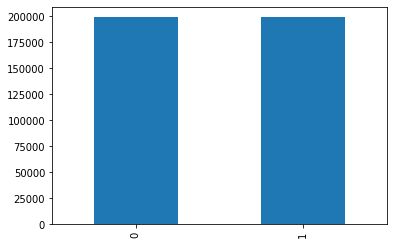

In [54]:
#Veamos si esta equilibrado
pd.Series(y_train_new).value_counts().plot(kind="bar")


Como podemos ver ya se equilibraron los datos. Podemos empezar a crear modelos predictivos.

## Logistic Regression¶


In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, solver = 'lbfgs')
clf.fit(X_train_new, y_train_new)
train_pred = clf.predict(X_train_new)
test_pred = clf.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Puntuación de precisión del conjunto de datos de entrenamiento = ', accuracy_score(train_pred, y_train_new))
print('Puntuación de precisión para el conjunto de datos de prueba = ', accuracy_score(test_pred, y_test))

Puntuación de precisión del conjunto de datos de entrenamiento =  0.951135564264898
Puntuación de precisión para el conjunto de datos de prueba =  0.9761244338330817


In [93]:
#Matriz de confusion
cm=confusion_matrix(y_test, test_pred)
cm

array([[83268,  2027],
       [   13,   135]], dtype=int64)

Text(0.5, 1.0, 'Trazado de la matriz de confusión para el modelo de regresión logística')

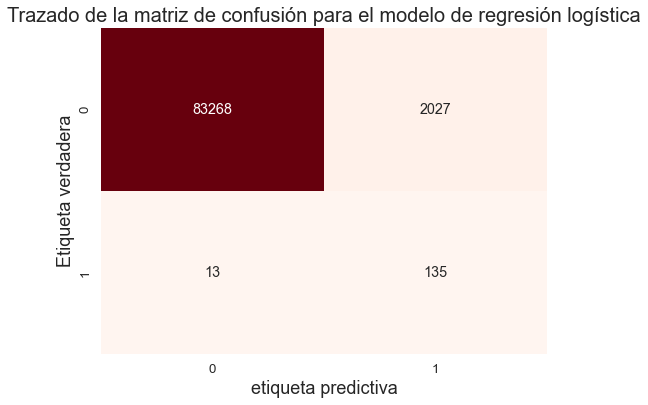

In [62]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Reds", cbar = False)
plt.xlabel("etiqueta predictiva", size = 18)
plt.ylabel("Etiqueta verdadera", size = 18)
plt.title("Trazado de la matriz de confusión para el modelo de regresión logística", size = 20)

In [65]:
print("El porcentaje de casos 'sin Fraude' clasificados erróneamente mediante regresión logística es:", (2018/85295)*100)
print("Porcentaje de casos de 'Fraude' con predicción errónea de regresión logística:", (13/148)*100)

El porcentaje de casos 'sin Fraude' clasificados erróneamente mediante regresión logística es: 2.3659065595873146
Porcentaje de casos de 'Fraude' con predicción errónea de regresión logística: 8.783783783783784


Para la primera clase hubo 2027 falsos positivos, para la segunda solo 13. Solo es muy poco, comparado al tamaño de las clases respectivamente como se púede ver en los porcentajes anteriores.

In [94]:
# Recuperación (Recall / Sensibilidad):
recall = recall_score(y_test, test_pred)
print(f"Recuperación (Recall): {recall:.4f}")


# Exactitud (Accuracy):
accuracy = accuracy_score(y_test,test_pred)
print(f"Exactitud (Accuracy): {accuracy:.4f}")

Recuperación (Recall): 0.9122
Exactitud (Accuracy): 0.9761


## Uso de redes neuronales(Tensorflow)

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

Arquitectura del modelo

In [69]:
from tensorflow.keras.layers import Input 


# X_train_new.shape[1] te da el número de características en tu conjunto de datos.
input_shape = (X_train_new.shape[1],) 

model = Sequential()
# Añade la capa Input primero
model.add(Input(shape=input_shape))
# Ahora, la primera capa Dense ya no necesita input_dim
model.add(Dense(X_train_new.shape[1], activation = 'relu')) 
model.add(BatchNormalization())

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

# Opcional: Imprime el resumen del modelo para verificar
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 31)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 31)                  │             124 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,901 (30.86 KB)

 Trainable params: 7,583 (29.62 KB)

 Non-trainable params: 318 (1.24 KB)

Los hiperparámetros que utilizamos son la Batch Normalization, y Dropout. La función de activación que utilizamos para las capas ocultas es "relu", y para la salida, la función "Sigmoide". También utilizamos dos capas ocultas con 64 unidades cada una.

## Optimizador

In [71]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy')

Para proteger nuestro modelo del sobreajuste, utilizaremos la función de detención temprana de Tensorflow. Esta función, una vez que la métrica de evaluación mencionada deja de mejorar, detendrá el número de épocas. También utilizamos una tasa de aprendizaje de 0,0001.

In [73]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

In [74]:
history = model.fit(x=X_train_new, y=y_train_new, batch_size = 256, epochs=150,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3894 - val_loss: 0.0923
Epoch 2/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1258 - val_loss: 0.0689
Epoch 3/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0847 - val_loss: 0.0549
Epoch 4/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0596 - val_loss: 0.0407
Epoch 5/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0463 - val_loss: 0.0299
Epoch 6/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0360 - val_loss: 0.0271
Epoch 7/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0293 - val_loss: 0.0235
Epoch 8/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0232 - val_loss: 0.0198
Epoch 9/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0213 - val_loss: 0.0190
Epoch 10/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0193 - val_loss: 0.0186
Epoch 11/150
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0171 - val_loss: 0.0160
Epoch 12/150
1555/1

57 bastaron para el modelo

Text(0.5, 1.0, 'Pérdida tanto para el entrenamiento como para la validación')

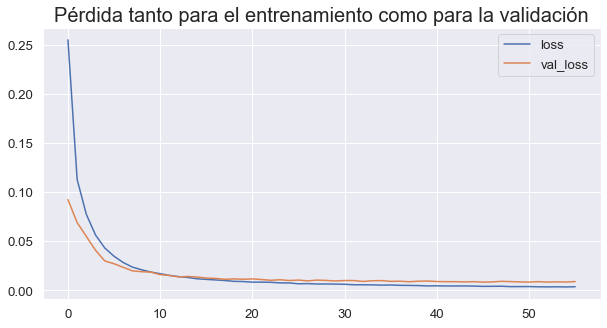

In [75]:
evaluation_metrics=pd.DataFrame(model.history.history)
evaluation_metrics.plot(figsize=(10,5))
plt.title("Pérdida tanto para el entrenamiento como para la validación", size = 20)

In [81]:
y_pred = model.predict(X_test)
# Para una clasificación binaria con sigmoide, el umbral común es 0.5
# Esto devolverá 1 si la probabilidad es >= 0.5, y 0 en caso contrario.
y_pred_classes = (y_pred >= 0.5).astype(int)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step


Ahora veamos la matriz de confusion resultante

In [82]:
cm_nn=confusion_matrix(y_test, y_pred_classes)
cm_nn

array([[85192,   103],
       [   29,   119]], dtype=int64)

Text(0.5, 1.0, 'Trazado de la matriz de confusión para el modelo de red neuronal')

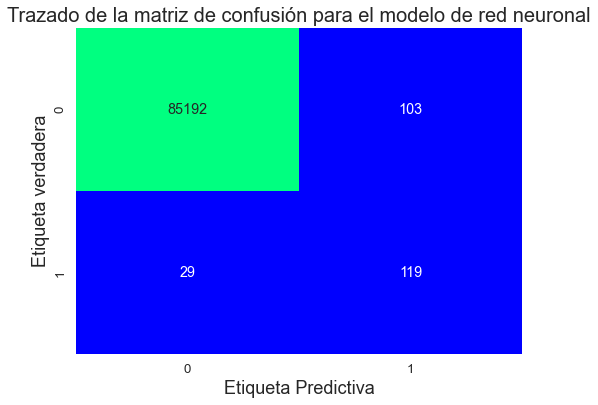

In [83]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm_nn, annot=True, fmt = 'g', cmap="winter", cbar = False)
plt.xlabel("Etiqueta Predictiva", size = 18)
plt.ylabel("Etiqueta verdadera", size = 18)
plt.title("Trazado de la matriz de confusión para el modelo de red neuronal", size = 20)

In [95]:
# Encontremos las puntuaciones de precisión y recuperación.
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred_classes)
print(f"Precisión (Precision): {precision:.4f}")

# Recuperación (Recall / Sensibilidad):
recall = recall_score(y_test, y_pred_classes)
print(f"Recuperación (Recall): {recall:.4f}")


# Exactitud (Accuracy):
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Exactitud (Accuracy): {accuracy:.4f}")

Precisión (Precision): 0.5360
Recuperación (Recall): 0.8041
Exactitud (Accuracy): 0.9985


Comparando ambos modelos: el problema esta en que ofrece una predicción muy buena para la clase mayoritaria (0= casos "sin fraude"), pero para la clase minoritaria (1= casos de "fraude"), su rendimiento es ligeramente inferior al de la regresión logística. Sin embargo, ajustando un poco más los hiperparámetros, el modelo podrá tener un mejor rendimiento que la regresión logística incluso para la clase minoritaria.